## Importing required libraries

In [1]:
import numpy as np # Used for numerical operations, arrays, and mathematical computations.
import pandas as pd # Helps in data manipulation and analysis using DataFrames and Series.
import matplotlib.pyplot as plt # Used for creating static, animated, and interactive visualizations.
%matplotlib inline 
# Display matplotlib plots directly in Jupyter Notebook cells
import seaborn as sns # A visualization library built on top of Matplotlib, used for more attractive and informative statistical plots.
from sklearn import metrics # Import evaluation metrics for classification, regression, and clustering models
import warnings # Import the warnings module to control warning messages
warnings.filterwarnings('ignore') # Suppress all warning messages during code execution
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # Import specific metrics for evaluating classification model performance

In [2]:
# Importing AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading data

In [3]:
#Loading data into dataframe
data = pd.read_csv("../data/phishing.csv")

## Displaying top 5 records

In [4]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## Diisplaying bottom 5 records

In [5]:
data.tail()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,11053,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


## Splitting the dataset into dependant and independant fetature

In [6]:
X = data.drop(["class"],axis =1)
y = data["class"]

## Splitting the dataset into train and test sets: 80-20 split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 31), (8843,), (2211, 31), (2211,))

## AdaBoost Model

In [8]:
# Initializing and training the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [9]:
# Making predictions with the AdaBoost model
y_pred_ada = ada_model.predict(X_test)

In [10]:
# Evaluating the AdaBoost model
print("AdaBoost Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

AdaBoost Model Evaluation:
Confusion Matrix:
 [[ 893   83]
 [  59 1176]]


## Classification Report

In [11]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

Accuracy Score: 0.9357756671189507
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.91      0.93       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.94      0.94      0.94      2211



## Generate the confusion matrix for AdaBoost


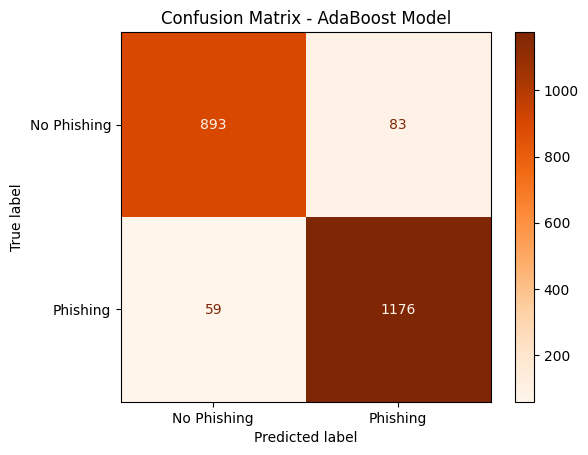

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_ada = confusion_matrix(y_test, y_pred_ada)

# Plot the confusion matrix graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=['No Phishing', 'Phishing'])
disp.plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix - AdaBoost Model")
plt.show()

## Save the AdaBoost model


In [13]:
import joblib
joblib.dump(ada_model, "../model/adaboost_model.pkl")

['../model/adaboost_model.pkl']